In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from Utils import Processing
from Models import ANN_1, ConvMassimo

from sklearn.metrics import confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

importlib.reload(Processing)
importlib.reload(ANN_1)

2023-10-01 09:37:49.408910: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 09:37:49.438600: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-01 09:37:49.438643: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-01 09:37:49.438665: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-01 09:37:49.444227: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 09:37:49.444938: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

<module 'Models.ANN_1' from '/home/davide/Desktop/Alzheimer_detection/Alzheimer_detection/Models/ANN_1.py'>

In [44]:
X_train = np.load('PCA_Data/X_train_pca.npy')
y_train = np.load('PCA_Data/y_train.npy')
labels_train = np.load('PCA_Data/labels_list_train.npy')

X_test = np.load('PCA_Data/X_test_pca.npy')
y_test = np.load('PCA_Data/y_test.npy')
labels_test = np.load('PCA_Data/labels_list_test.npy')

In [45]:
X_train = X_train.reshape(-1, 27, 27)
X_test = X_test.reshape(-1, 27, 27)
# normalize each image with min-max normalization
#for i in range(len(X_train)):
#    max = X_train[i].max()
#    min = X_train[i].min()
#    X_train[i] = (X_train[i] - min) / (max - min)
#
#for i in range(len(X_test)):
#    max = X_test[i].max()
#    min = X_test[i].min()
#    X_test[i] = (X_test[i] - min) / (max - min)

In [4]:
#from Utils import Visualizing
#importlib.reload(Visualizing)
#
#Visualizing.display2([X_train], labels_train)

In [46]:
validation_percentage = 0.20
X_val = X_train[int(1-validation_percentage * len(X_train)):]
X_train = X_train[:int(1-validation_percentage * len(X_train))]
y_val = y_train[int(1-validation_percentage * len(y_train)):]
y_train = y_train[:int(1-validation_percentage * len(y_train))]
labels_val = labels_train[int(1-validation_percentage * len(labels_train)):]
labels_train = labels_train[:int(1-validation_percentage * len(labels_train))]

In [47]:
labels_train

array([['MildDemented'],
       ['VeryMildDemented'],
       ['VeryMildDemented'],
       ...,
       ['VeryMildDemented'],
       ['NonDemented'],
       ['NonDemented']], dtype='<U16')

In [52]:
df_labels_train = pd.DataFrame(labels_train, columns=['label'])
df_labels_train['label'].value_counts()

label
NonDemented         2069
VeryMildDemented    1436
MildDemented         551
ModerateDemented      42
Name: count, dtype: int64

In [53]:
# one hot encoding df_labels_train
df_labels_train = pd.get_dummies(df_labels_train['label'])
df_labels_train = df_labels_train.astype(int)
# rearrainging columns
df_labels_train = df_labels_train[['NonDemented', 'VeryMildDemented', 'MildDemented', "ModerateDemented"]]
df_labels_train

,MildDemented,ModerateDemented,NonDemented,VeryMildDemented
0,1,0,0,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
4093,0,0,1,0
4094,0,0,1,0
4095,0,0,0,1
4096,0,0,1,0


In [40]:
# one hot encoding labels
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(labels_train.reshape(-1, 1))
labels_train = enc.transform(labels_train.reshape(-1, 1)).toarray()
labels_val = enc.transform(labels_val.reshape(-1, 1)).toarray()
labels_test = enc.transform(labels_test.reshape(-1, 1)).toarray()

In [7]:
# labels_train = Processing.convert_labels(labels_train)
# labels_train = labels_train/(labels_train.max())
# 
# labels_val = Processing.convert_labels(labels_val)
# labels_val = labels_val/(labels_val.max())
# 
# labels_test = Processing.convert_labels(labels_test)
# labels_test = labels_test/(labels_test.max())

In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(4098, 27, 27)
(1023, 27, 27)
(1279, 27, 27)
(array([0., 1.]), array([12294,  4098]))
(array([0., 1.]), array([3069, 1023]))
(array([0., 1.]), array([3837, 1279]))


In [43]:
labels_train

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [41]:
print(labels_train.shape)
print(np.unique(labels_val, return_counts=True))
print(np.unique(labels_test, return_counts=True))

(array([0., 1.]), array([12294,  4098]))
(array([0., 1.]), array([3069, 1023]))
(array([0., 1.]), array([3837, 1279]))


In [42]:
np.unique(labels_train, return_counts=True)

(array([0., 1.]), array([12294,  4098]))

In [9]:
#importlib.reload(ConvMassimo)
#model = ConvMassimo.build_Model(input_shape=(27,27,1))
#model.summary()

In [10]:
importlib.reload(ANN_1)
model = ANN_1.build_Model(input_shape=(27,27))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 27, 27)]          0         
                                                                 
 flatten (Flatten)           (None, 729)               0         
                                                                 
 dense (Dense)               (None, 729)               532170    
                                                                 
 dense_1 (Dense)             (None, 729)               532170    
                                                                 
 dense_2 (Dense)             (None, 4)                 2920      
                                                                 
Total params: 1067260 (4.07 MB)
Trainable params: 1067260 (4.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
hystory = model.fit(
    x=X_train,
    y=labels_train,
    epochs=100,
    batch_size=128,
    shuffle=True,
    verbose=1,
    validation_data=(X_val, labels_val),
)

Epoch 1/100
33/33 [==============================] - 1s 27ms/step - loss: 1.5168 - categorical_accuracy: 0.3511 - val_loss: 1.2668 - val_categorical_accuracy: 0.4448
Epoch 2/100
33/33 [==============================] - 1s 26ms/step - loss: 1.1145 - categorical_accuracy: 0.5134 - val_loss: 1.3350 - val_categorical_accuracy: 0.4409
Epoch 3/100
33/33 [==============================] - 1s 27ms/step - loss: 1.0101 - categorical_accuracy: 0.5459 - val_loss: 1.2859 - val_categorical_accuracy: 0.4301
Epoch 4/100
33/33 [==============================] - 1s 25ms/step - loss: 0.8626 - categorical_accuracy: 0.6020 - val_loss: 1.3706 - val_categorical_accuracy: 0.4252
Epoch 5/100
33/33 [==============================] - 1s 25ms/step - loss: 0.8317 - categorical_accuracy: 0.6079 - val_loss: 1.3539 - val_categorical_accuracy: 0.4340
Epoch 6/100
33/33 [==============================] - 1s 23ms/step - loss: 0.7651 - categorical_accuracy: 0.6528 - val_loss: 1.4394 - val_categorical_accuracy: 0.4057
Epoc

<Axes: title={'center': 'Hystory loss'}>

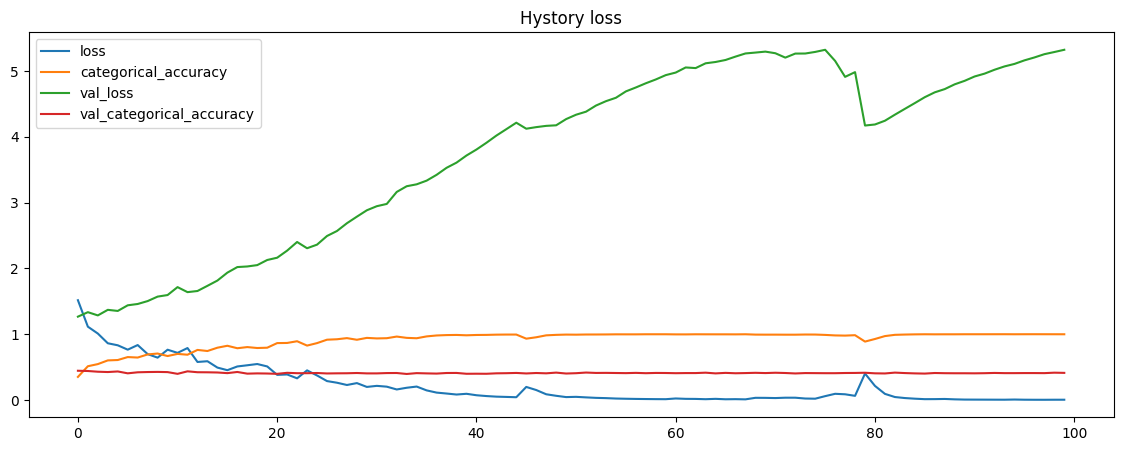

In [12]:
df_hystory = pd.DataFrame(hystory.history)
df_hystory.plot(figsize=(14, 5), title='Hystory loss')

In [13]:
predictions = model.predict(X_test)
predictions

40/40 [==============================] - 0s 1ms/step


array([[6.9934111e-05, 4.2027812e-05, 9.8870778e-01, 1.1180151e-02],
       [3.4072271e-04, 1.2245533e-03, 1.1145819e-01, 8.8697648e-01],
       [8.9433730e-01, 4.1048569e-03, 1.0153008e-01, 2.7743135e-05],
       ...,
       [8.4349478e-04, 2.6356635e-04, 6.1114854e-04, 9.9828184e-01],
       [1.5727548e-05, 4.6321400e-04, 9.8080599e-01, 1.8715084e-02],
       [2.1596210e-05, 5.7230759e-03, 9.5112371e-01, 4.3131620e-02]],
      dtype=float32)

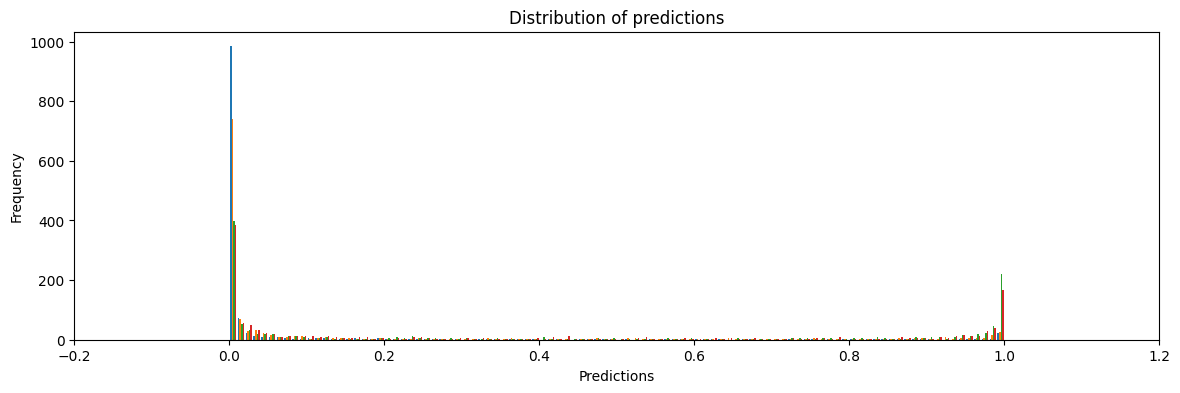

In [19]:
# plot distribution of predictions
plt.figure(figsize=(14,4))
plt.hist(predictions,bins=100)
plt.title("Distribution of predictions")
plt.xlabel("Predictions")
plt.ylabel("Frequency")
# add three vertical lines to show where the classes are
#plt.axvline(x=0.004442925495557074, color='r', linestyle='-')
#plt.axvline(x=0.031090150887552345, color='r', linestyle='-')
#plt.axvline(x=0.5266472253919953, color='r', linestyle='-')
# plt.axvline(x=0.0, color='g', linestyle='-')
# plt.axvline(x=0.333, color='g', linestyle='-')
# plt.axvline(x=0.666, color='g', linestyle='-')
# plt.axvline(x=1.0, color='g', linestyle='-')
# plt.axvline(x=0.1665, color='r', linestyle='--')
# plt.axvline(x=0.5, color='r', linestyle='--')
# plt.axvline(x=0.833, color='r', linestyle='--')
plt.xlim(-0.2,1.2)
plt.show();

In [15]:
# computer regression metrics
print('R2 score: ', r2_score(labels_test, predictions))
print('MAE: ', mean_absolute_error(labels_test, predictions))
print('MSE: ', mean_squared_error(labels_test, predictions))

R2 score:  -3.4497290334928725
MAE:  0.3282984859120792
MSE:  0.281862450175304


In [31]:
# convert soft max predictions to labels
labels_pred =  np.argmax(predictions, axis=1)
labels_pred = labels_pred.astype(str)
labels_pred 

array(['2', '3', '0', ..., '3', '2', '2'], dtype='<U21')

In [16]:
#predictions_class = predictions * 3
#predictions_class = predictions_class.round()
#predictions_class = predictions_class.astype(int)
#predictions_class

In [32]:
# convert one hot encoding labels to labels
#labels_test = np.argmax(labels_test, axis=1)
labels_test = labels_test.astype(str)
labels_test

array(['3', '3', '2', ..., '2', '2', '3'], dtype='<U21')

In [29]:
#labels_test_class = labels_test *3
#labels_test_class = labels_test_class.astype(int)
#labels_test_class

In [35]:
# compute classification metrics
#print(classification_report(labels_test_class, predictions_class))
print(classification_report(labels_test, labels_pred))

              precision    recall  f1-score   support

           0       0.14      0.06      0.08       179
           1       0.01      0.17      0.02        12
           2       0.51      0.42      0.46       640
           3       0.35      0.37      0.36       448

    accuracy                           0.35      1279
   macro avg       0.25      0.25      0.23      1279
weighted avg       0.40      0.35      0.37      1279



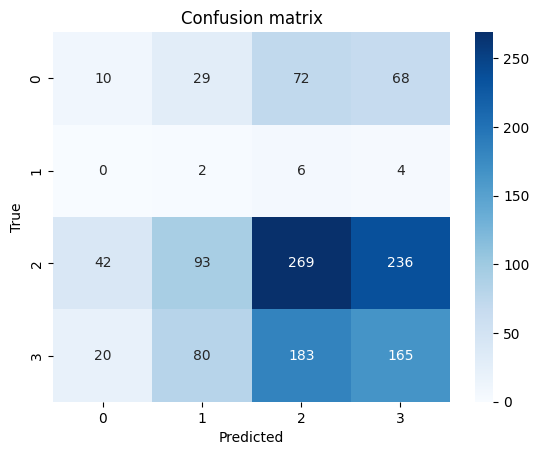

In [34]:
# confusion matrix
cm = confusion_matrix(labels_test, labels_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()

In [ ]:
labels_train_class = labels_train *3
labels_train_class = labels_train_class.astype(int)
labels_train_class

array([2, 1, 1, ..., 1, 0, 0])